In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
! pip install kaggle

In [3]:
import os

# Check if kaggle.json exists
if not os.path.exists('/root/.kaggle/kaggle.json'):
    from google.colab import files
    files.upload()

    # Copy the uploaded file to ~/.kaggle folder
    ! mkdir -p ~/.kaggle
    ! cp kaggle.json ~/.kaggle/
    ! chmod 600 ~/.kaggle/kaggle.json
    print("kaggle.json file uploaded successfully.")
else:
    print("kaggle.json file already exists. Skipping upload.")

kaggle.json file already exists. Skipping upload.


In [4]:
import os
import shutil

# Specify the path to the folder to be deleted
folder_to_delete = '/content/dataset'

# Check if the folder exists before attempting to delete it
if os.path.exists(folder_to_delete):
    # Use shutil.rmtree() to delete the folder and its contents recursively
    shutil.rmtree(folder_to_delete)
    print("Folder 'dataset' and its contents have been deleted.")
else:
    print("Folder 'dataset' does not exist.")

Folder 'dataset' and its contents have been deleted.


In [5]:
! kaggle datasets download -d saroz014/plant-disease

plant-disease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
! unzip plant-disease.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43942641-100d-409a-a349-99175f84c629___YLCV_NREC 2938.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43a32428-0d45-4851-bb62-c1a669854990___YLCV_NREC 2630.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43a5145b-57e9-4605-8ba3-1fb90f61d460___YLCV_NREC 0108.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43a73727-237f-40e0-b7e1-95bf4d0eb756___YLCV_GCREC 5343.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43aae6d1-40ae-42f4-8b71-ae9351683a90___UF.GRC_YLCV_Lab 02661.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43b2be62-cb86-46f4-9049-92e77d4f335b___YLCV_NREC 0074.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43b8aec7-59df-413d-9afd-9cbf481695fd___UF.GRC_YLCV_Lab 09423.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Le

In [7]:
!pip install tensorflow

In [8]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
import shutil

# Define the root directory of your dataset
root_dir = '/content/dataset/dataset/train'

# Define the directory for the validation set
valid_dir = '/content/dataset/dataset/valid'

# List all the subdirectories (classes) in the root directory
subdirs = [subdir for subdir in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, subdir))]

# Iterate through each subdirectory
for subdir in subdirs:
    subdir_path = os.path.join(root_dir, subdir)

    # List all the files (images) in the subdirectory
    files = [file for file in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, file))]

    # Calculate the number of files to move to the validation set (20% of total files)
    num_files_valid = int(0.2 * len(files))

    # Create the corresponding subdirectory in the validation directory if it doesn't exist
    valid_subdir = os.path.join(valid_dir, subdir)
    os.makedirs(valid_subdir, exist_ok=True)

    # Move the files to the validation set
    for i in range(num_files_valid):
        file_to_move = files[i]
        src_path = os.path.join(subdir_path, file_to_move)
        dest_path = os.path.join(valid_subdir, file_to_move)
        shutil.move(src_path, dest_path)
        print(f'Moved {file_to_move} to {valid_subdir}')

print('Validation data split completed.')

Streaming output truncated to the last 5000 lines.
Moved e74a39a8-06fe-42ab-8b1b-c1c9a42e0e78___CREC_HLB 5246.JPG to /content/dataset/dataset/valid/Orange___Haunglongbing_(Citrus_greening)
Moved ee0faa48-c5a6-4021-966e-6f5250e4ffb2___UF.Citrus_HLB_Lab 0222.JPG to /content/dataset/dataset/valid/Orange___Haunglongbing_(Citrus_greening)
Moved 637e1c73-adaa-48f5-bb66-591af98a99db___CREC_HLB 5213.JPG to /content/dataset/dataset/valid/Orange___Haunglongbing_(Citrus_greening)
Moved 53653380-c954-4560-b9d2-24134990452e___CREC_HLB 4503.JPG to /content/dataset/dataset/valid/Orange___Haunglongbing_(Citrus_greening)
Moved 109de7a1-b72a-44f3-93dc-3eaef5629da7___CREC_HLB 5618.JPG to /content/dataset/dataset/valid/Orange___Haunglongbing_(Citrus_greening)
Moved d45c871a-89a9-4a90-b502-096b3552b65e___UF.Citrus_HLB_Lab 9818.JPG to /content/dataset/dataset/valid/Orange___Haunglongbing_(Citrus_greening)
Moved eefa5931-e4c8-4184-9f5c-bc6d8e3c94a7___UF.Citrus_HLB_Lab 1558.JPG to /content/dataset/dataset/val

In [10]:
# Define Directories
train_data_dir = "/content/dataset/dataset/train"
valid_data_dir = "/content/dataset/dataset/valid"
test_data_dir = "/content/dataset/dataset/test"

# Define Parameters
parameters = {"img_width" : 224,
              "img_height": 224,
              "epochs": 30,
              "batch_size" : 64}

# Define Generators
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255
)

test_datagen = ImageDataGenerator(
    rescale = 1/255)

# Define Flows from directories
train_generator = train_datagen.flow_from_directory(
    directory = train_data_dir,
    target_size=(parameters["img_width"], parameters["img_height"]),
    batch_size = parameters["batch_size"],
    class_mode= "categorical",
    subset = "training",
    # color_mode = "grayscale",
    seed = 42)

validation_generator = validation_datagen.flow_from_directory(
    directory = valid_data_dir,
    target_size = (parameters["img_width"], parameters["img_height"]),
    batch_size = parameters["batch_size"],
    class_mode='categorical',
    # color_mode = "grayscale",
    seed = 42)

testing_generator = test_datagen.flow_from_directory(
    directory = test_data_dir,
    target_size = (parameters["img_width"], parameters["img_height"]),
    batch_size = parameters["batch_size"],
    color_mode = "grayscale",
    # class_mode = "categorical",
    seed = 42)

Found 34781 images belonging to 38 classes.
Found 8675 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [11]:
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="training",  # Specify subset for training
    seed = 123 # Set seed for shuffling
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_data_dir,  # Use the same directory for validation
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="validation" , # Specify subset for validation
    seed = 123
)

Found 34781 files belonging to 38 classes.
Found 8675 files belonging to 38 classes.


In [12]:
diseases = train_ds.class_names

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_data_dir + '/' + disease))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["count"])
img_per_class

,count
Apple___Apple_scab,404
Apple___Black_rot,398
Apple___Cedar_apple_rust,176
Apple___healthy,1053
Blueberry___healthy,962
Cherry_(including_sour)___Powdery_mildew,674
Cherry_(including_sour)___healthy,548
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,329
Corn_(maize)___Common_rust_,764
Corn_(maize)___Northern_Leaf_Blight,631


Text(0.5, 1.0, 'Images per each class of plant disease')

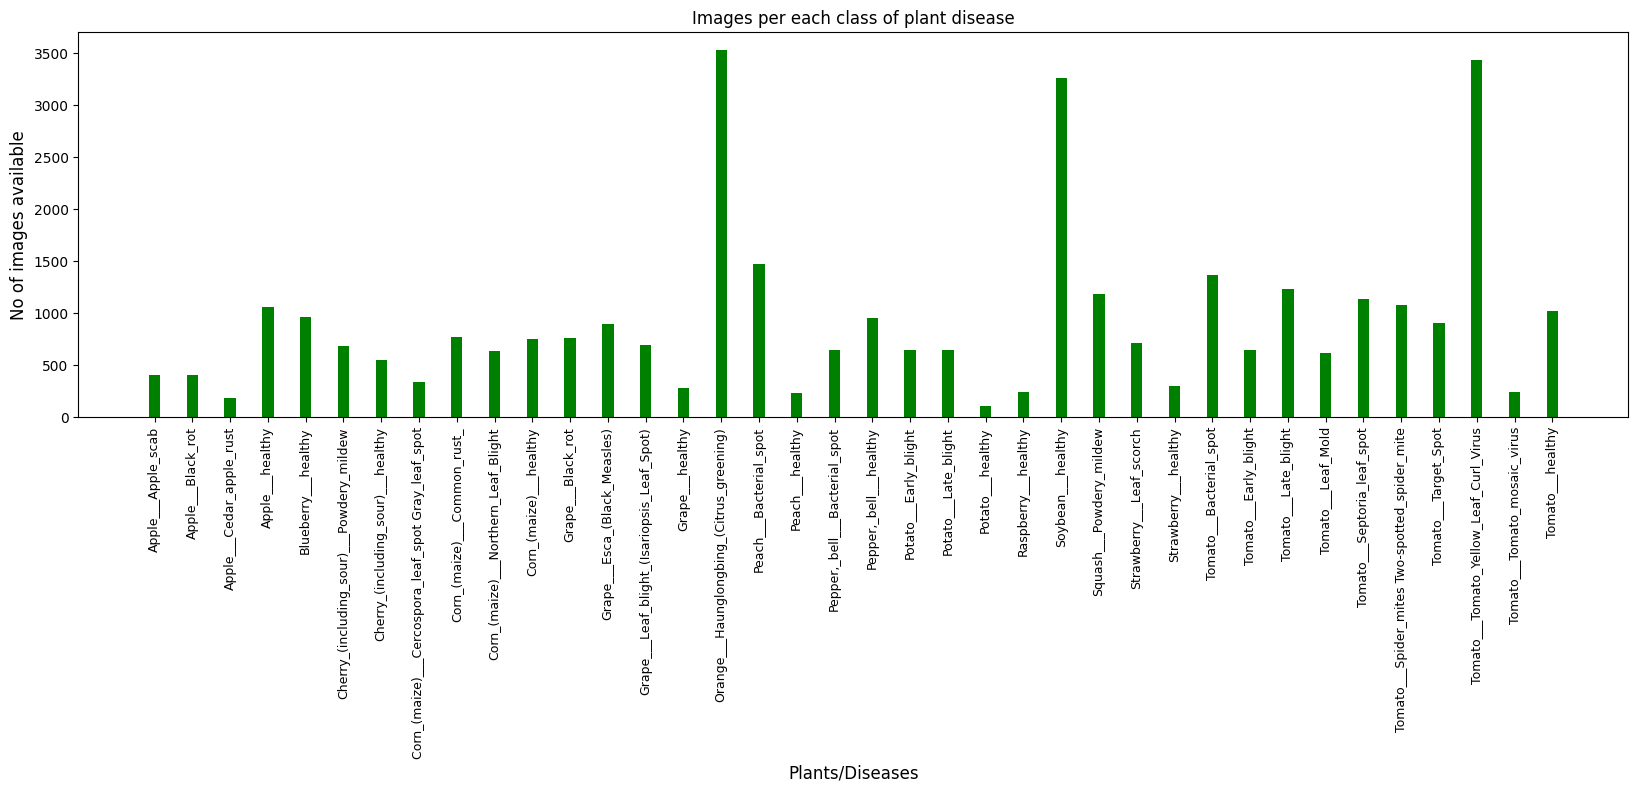

In [14]:
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3, color='green')
plt.xlabel('Plants/Diseases', fontsize=12)
plt.ylabel('No of images available', fontsize=12)
plt.xticks(index, diseases, fontsize=9, rotation=90)
plt.title('Images per each class of plant disease')

In [15]:
to_augment = []
filtered_df = img_per_class[img_per_class['count'] <= 1000]
filtered_df.index

Index(['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust',
       'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew',
       'Cherry_(including_sour)___healthy',
       'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
       'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight',
       'Corn_(maize)___healthy', 'Grape___Black_rot',
       'Grape___Esca_(Black_Measles)',
       'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
       'Peach___healthy', 'Pepper,_bell___Bacterial_spot',
       'Pepper,_bell___healthy', 'Potato___Early_blight',
       'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy',
       'Strawberry___Leaf_scorch', 'Strawberry___healthy',
       'Tomato___Early_blight', 'Tomato___Leaf_Mold', 'Tomato___Target_Spot',
       'Tomato___Tomato_mosaic_virus'],
      dtype='object')

In [16]:
idx = list(filtered_df.index)

In [17]:
source_folder=train_data_dir
destination_folder=os.path.join("/content/dataset/dataset","to_augment")
print(destination_folder)
if not os.path.exists(destination_folder):
    os.mkdir(destination_folder)

    subdirectories = idx
    for subdirectory in subdirectories:

          subdirectory_path = os.path.join(source_folder, subdirectory)
          shutil.copytree(subdirectory_path, os.path.join(destination_folder, subdirectory))

/content/dataset/dataset/to_augment


In [18]:
from keras.preprocessing.image import ImageDataGenerator
from collections import Counter
to_augment_dir = "/content/dataset/dataset/to_augment"
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # validation_split=0.2,
    fill_mode='nearest'
)
flow_generator = datagen.flow_from_directory(
    to_augment_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    # subset = "training",
    seed = 123 # Set seed for shuffling
)

Found 15059 images belonging to 27 classes.


In [19]:
from PIL import Image
output_dir = train_data_dir

In [20]:
import numpy as np

# Define the target number of images for each class (at least 2000)
target_images_per_class = 1100
output_dir = to_augment_dir
# Initialize counters for each class
class_counts = {class_name: 0 for class_name in flow_generator.class_indices.keys()}

while True:
    batch = flow_generator.next()
    images, labels = batch
    stop_augmentation = True

    for i, label in enumerate(labels):
        class_index = np.argmax(label)  # Get the class index from one-hot encoding
        class_name = list(flow_generator.class_indices.keys())[class_index]  # Convert index to class name

        nums[class_name] = len(os.listdir(to_augment_dir + '/' + class_name))# the numbers in train

        # Continue if the class has reached the target count
        if nums[class_name] >= target_images_per_class:
            continue

        stop_augmentation = False  # Indicate that we're still processing
        image_data = images[i]
        image_data = (image_data * 255).astype(np.uint8)
        image = Image.fromarray(image_data)

        output_dir_curr = os.path.join(output_dir, class_name)
        os.makedirs(output_dir_curr, exist_ok=True)

        class_counts[class_name] += 1  # Increment the count for the processed class
        image.save(os.path.join(output_dir_curr, f'augmented_{class_counts[class_name]}.jpeg'))  # Save the image

    # Break the loop if all classes reached the target count
    if stop_augmentation:
        break


In [21]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    to_augment_dir,
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="training",  # Specify subset for training
    seed = 123 # Set seed for shuffling
)
diseases = train_ds.class_names
import shutil
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(to_augment_dir + '/' + disease))
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["count"])
to_augment = []
filtered_df = img_per_class[img_per_class['count'] <= 1000]
source_folder=to_augment_dir
destination_folder=os.path.join("/content/dataset/dataset","to_augment2")
print(destination_folder)
idx = list(filtered_df.index)
if not os.path.exists(destination_folder):
    os.mkdir(destination_folder)

    subdirectories = idx
    for subdirectory in subdirectories:

          subdirectory_path = os.path.join(source_folder, subdirectory)
          shutil.copytree(subdirectory_path, os.path.join(destination_folder, subdirectory))

Found 24417 files belonging to 27 classes.
/content/dataset/dataset/to_augment2


In [22]:
to_augment_dir2 = "/content/dataset/dataset/to_augment2"
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # validation_split=0.2,
    fill_mode='nearest'
)
flow_generator = datagen.flow_from_directory(
    to_augment_dir2,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    # subset = "training",
    seed = 123 # Set seed for shuffling
)
# Define the target number of images for each class (at least 2000)
target_images_per_class = 1100
output_dir = to_augment_dir
# Initialize counters for each class
class_counts = {class_name: 0 for class_name in flow_generator.class_indices.keys()}

while True:
    batch = flow_generator.next()
    images, labels = batch
    stop_augmentation = True

    for i, label in enumerate(labels):
        class_index = np.argmax(label)  # Get the class index from one-hot encoding
        class_name = list(flow_generator.class_indices.keys())[class_index]  # Convert index to class name

        nums[class_name] = len(os.listdir(to_augment_dir + '/' + class_name))# the numbers in train

        # Continue if the class has reached the target count
        if nums[class_name] >= target_images_per_class:
            continue

        stop_augmentation = False  # Indicate that we're still processing
        image_data = images[i]
        image_data = (image_data * 255).astype(np.uint8)
        image = Image.fromarray(image_data)

        output_dir_curr = os.path.join(output_dir, class_name)
        os.makedirs(output_dir_curr, exist_ok=True)

        class_counts[class_name] += 1  # Increment the count for the processed class
        image.save(os.path.join(output_dir_curr, f'augmented_{class_counts[class_name]}.jpeg'))  # Save the image

    # Break the loop if all classes reached the target count
    if stop_augmentation:
        break

Found 5717 images belonging to 10 classes.


In [23]:
import shutil
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(to_augment_dir + '/' + disease))
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["count"])
to_augment = []
filtered_df = img_per_class[img_per_class['count'] <= 1000]
print(filtered_df)
source_folder=to_augment_dir
destination_folder=os.path.join("/content/dataset/dataset","to_augment3")
print(destination_folder)
idx = list(filtered_df.index)
if not os.path.exists(destination_folder):
    os.mkdir(destination_folder)

    subdirectories = idx
    for subdirectory in subdirectories:

          subdirectory_path = os.path.join(source_folder, subdirectory)
          shutil.copytree(subdirectory_path, os.path.join(destination_folder, subdirectory))

to_augment_dir3 = "/content/dataset/dataset/to_augment3"
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # validation_split=0.2,
    fill_mode='nearest'
)
flow_generator = datagen.flow_from_directory(
    to_augment_dir3,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    # subset = "training",
    seed = 123 # Set seed for shuffling
)
# Define the target number of images for each class (at least 2000)
target_images_per_class = 1100
output_dir = to_augment_dir
# Initialize counters for each class
class_counts = {class_name: 0 for class_name in flow_generator.class_indices.keys()}

while True:
    batch = flow_generator.next()
    images, labels = batch
    stop_augmentation = True

    for i, label in enumerate(labels):
        class_index = np.argmax(label)  # Get the class index from one-hot encoding
        class_name = list(flow_generator.class_indices.keys())[class_index]  # Convert index to class name

        nums[class_name] = len(os.listdir(to_augment_dir + '/' + class_name))# the numbers in train

        # Continue if the class has reached the target count
        if nums[class_name] >= target_images_per_class:
            continue

        stop_augmentation = False  # Indicate that we're still processing
        image_data = images[i]
        image_data = (image_data * 255).astype(np.uint8)
        image = Image.fromarray(image_data)

        output_dir_curr = os.path.join(output_dir, class_name)
        os.makedirs(output_dir_curr, exist_ok=True)

        class_counts[class_name] += 1  # Increment the count for the processed class
        image.save(os.path.join(output_dir_curr, f'augmented_{class_counts[class_name]}.jpeg'))  # Save the image

    # Break the loop if all classes reached the target count
    if stop_augmentation:
        break

                          count
Apple___Cedar_apple_rust    845
Potato___healthy            464
/content/dataset/dataset/to_augment3
Found 1309 images belonging to 2 classes.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(to_augment_dir + '/' + disease))
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["count"])
img_per_class

,count
Apple___Apple_scab,1100
Apple___Black_rot,1100
Apple___Cedar_apple_rust,1100
Blueberry___healthy,1100
Cherry_(including_sour)___Powdery_mildew,1100
Cherry_(including_sour)___healthy,1100
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1100
Corn_(maize)___Common_rust_,1100
Corn_(maize)___Northern_Leaf_Blight,1100
Corn_(maize)___healthy,1100


Text(0.5, 1.0, 'Images augmented per each class of plant disease')

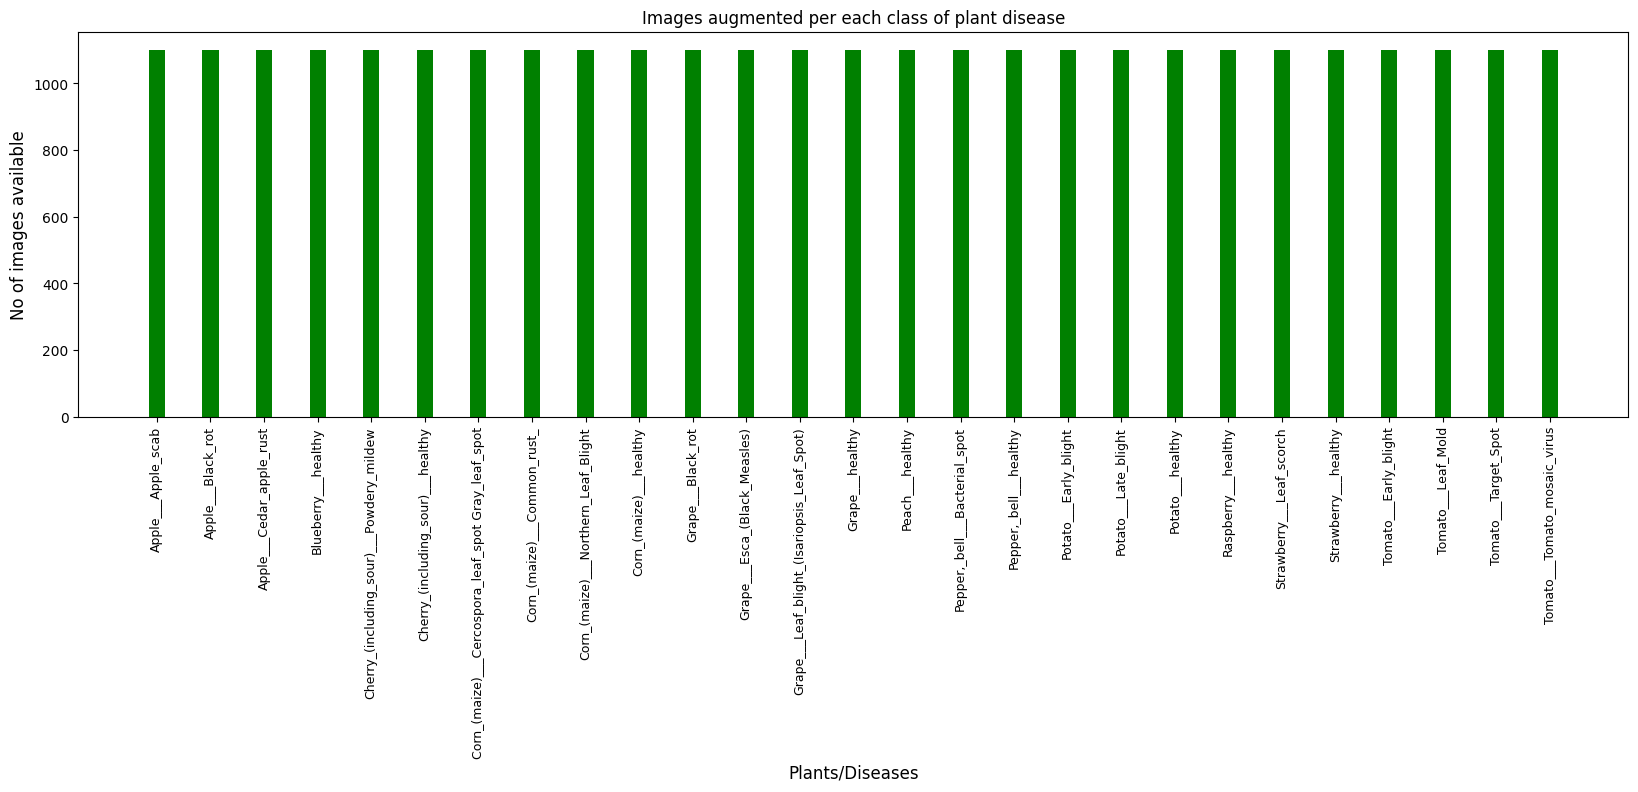

In [25]:
index = [n for n in range(27)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3, color='green')
plt.xlabel('Plants/Diseases', fontsize=12)
plt.ylabel('No of images available', fontsize=12)
plt.xticks(index, diseases, fontsize=9, rotation=90)
plt.title('Images augmented per each class of plant disease')

In [26]:
import random
nums = {}
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="training",  # Specify subset for training
    seed = 123 # Set seed for shuffling
)
diseases = train_ds.class_names
for disease in diseases:
    nums[disease] = len(os.listdir(train_data_dir + '/' + disease))
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["count"])
to_augment = []
filtered_df = img_per_class[img_per_class['count'] > 1000]
print(filtered_df)
source_folder=train_data_dir
destination_folder=os.path.join("/content/dataset/dataset","to_augment")
print(destination_folder)
idx = list(filtered_df.index)
num_samples_per_class = 1500

for class_name in filtered_df.index:
    source_dir = os.path.join(train_data_dir, class_name)
    destination_dir = os.path.join(destination_folder, class_name)
    if not os.path.exists(destination_dir):
        # Create the directory if it doesn't exist
        os.makedirs(destination_dir)

        # Your code to copy files or perform other actions in the destination directory
        print(f"Created directory: {destination_dir}")
    else:
        # Directory already exists, skip creation
        print(f"Directory already exists: {destination_dir}")
        continue

    # List all images in the source directory
    all_images = os.listdir(source_dir)

    # Randomly select num_samples_per_class images from the source directory
    selected_images = random.sample(all_images, min(num_samples_per_class, len(all_images)))

    # Copy the selected images to the destination directory
    for image_name in selected_images:
        source_path = os.path.join(source_dir, image_name)
        dest_path = os.path.join(destination_dir, image_name)
        shutil.copyfile(source_path, dest_path)

Found 34781 files belonging to 38 classes.
                                               count
Apple___healthy                                 1053
Orange___Haunglongbing_(Citrus_greening)        3525
Peach___Bacterial_spot                          1471
Soybean___healthy                               3258
Squash___Powdery_mildew                         1175
Tomato___Bacterial_spot                         1362
Tomato___Late_blight                            1223
Tomato___Septoria_leaf_spot                     1134
Tomato___Spider_mites Two-spotted_spider_mite   1073
Tomato___Tomato_Yellow_Leaf_Curl_Virus          3429
Tomato___healthy                                1019
/content/dataset/dataset/to_augment
Created directory: /content/dataset/dataset/to_augment/Apple___healthy
Created directory: /content/dataset/dataset/to_augment/Orange___Haunglongbing_(Citrus_greening)
Created directory: /content/dataset/dataset/to_augment/Peach___Bacterial_spot
Created directory: /content/dataset/data

Text(0.5, 1.0, 'Images augmented per each class of plant disease')

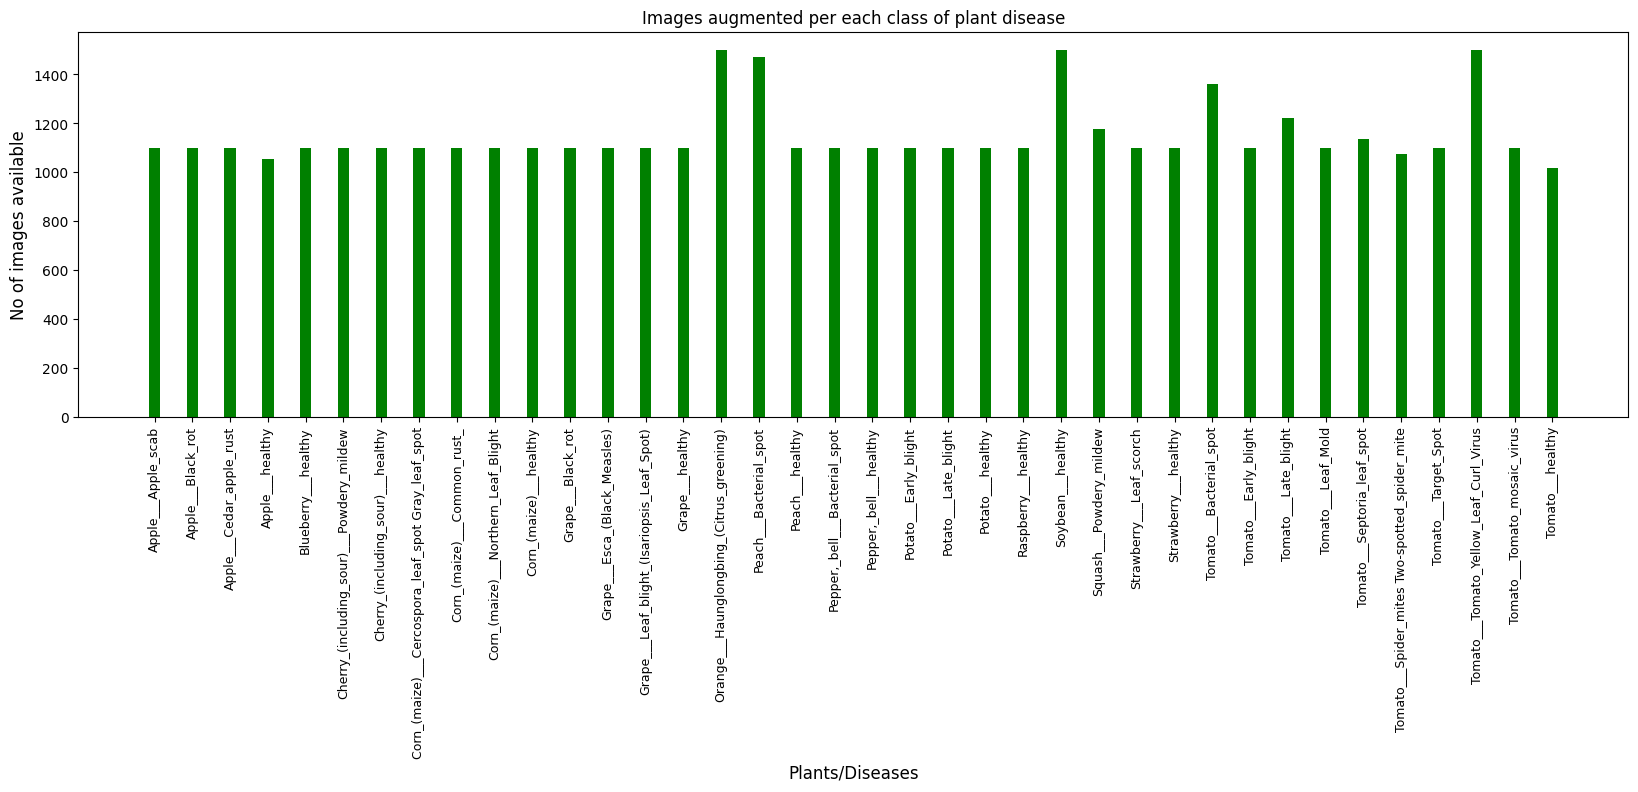

In [27]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(to_augment_dir + '/' + disease))
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["count"])
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3, color='green')
plt.xlabel('Plants/Diseases', fontsize=12)
plt.ylabel('No of images available', fontsize=12)
plt.xticks(index, diseases, fontsize=9, rotation=90)
plt.title('Images augmented per each class of plant disease')

In [28]:
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    to_augment_dir,
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="training",  # Specify subset for training
    seed = 123 # Set seed for shuffling
)
diseases = train_ds.class_names
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_data_dir,  # Use the same directory for validation
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="validation" , # Specify subset for validation
    seed = 123
)

Found 43710 files belonging to 38 classes.
Found 8675 files belonging to 38 classes.


Shape of the image tensor: (224, 224, 3)


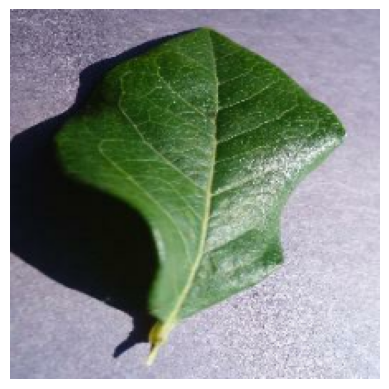

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming train_ds is already created

# Print one image from the first batch
for images, labels in train_ds.take(1):  # Take the first batch
    # Access the first image in the batch
    one_image = images[0]

    # Print the shape of the image tensor
    print("Shape of the image tensor:", one_image.shape)

    # Convert the image tensor to a NumPy array
    image_np = one_image.numpy()

    # Plot the image using matplotlib
    plt.imshow(image_np.astype("uint8"))  # Convert to uint8 for displaying
    plt.axis("off")  # Hide axis
    plt.show()


In [30]:
import tensorflow as tf

# Assuming train_ds is already created

total_images = 0
total_labels = 0

# Iterate over all batches to calculate total images and labels
for images, labels in train_ds:
    total_images += len(images)
    total_labels += len(labels)

print("Total images in train_ds:", total_images)
print("Total labels in train_ds:", total_labels)


Total images in train_ds: 43710
Total labels in train_ds: 43710


In [31]:
import tensorflow as tf

# Assuming train_ds is already created

total_images = 0
total_labels = 0

# Iterate over all batches to calculate total images and labels
for images, labels in val_ds:
    total_images += len(images)
    total_labels += len(labels)

print("Total images in train_ds:", total_images)
print("Total labels in train_ds:", total_labels)


Total images in train_ds: 8675
Total labels in train_ds: 8675


In [39]:
# Import required modules
import tensorflow as tf
import os
import numpy

In [41]:
# Function to preprocess images
def preprocess_image(image_path, label):
    # Read and decode image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG images with 3 channels

    # Resize image to desired dimensions
    image = tf.image.resize(image, [224, 224])  # Resize image to 224x224 pixels

    # Normalize pixel values to the range [0, 1]
    image = image / 255.0

    # Convert image to array and flatten
    image_array = tf.reshape(image, [-1])  # Flatten image into a vector

    # Convert label to one-hot encoding
    num_classes = 38  # Replace 28 with the actual number of classes
    label = tf.one_hot(label, num_classes)

    return image_array, label

# Function to load and preprocess images from directory
def load_and_preprocess_images(directory):
    # Get list of image paths and corresponding labels
    image_paths = []
    labels = []
    classes = sorted(os.listdir(directory))
    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        images = [os.path.join(class_dir, img_name) for img_name in os.listdir(class_dir)]
        image_paths.extend(images)
        labels.extend([class_idx] * len(images))

    # Create TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))

    # Shuffle dataset
    dataset = dataset.shuffle(buffer_size=len(image_paths), reshuffle_each_iteration=True)

    # Load and preprocess images in parallel
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Batch the dataset
    dataset = dataset.batch(batch_size)

    return dataset

# Define batch size
batch_size = 32

# Load and preprocess images from directory
train_ds = load_and_preprocess_images(to_augment_dir)

In [45]:
total_images = 0

# Iterate over all batches in the train_ds dataset
for images, labels in train_ds:
    total_images += images.shape[0]  # Add the number of images in the current batch

print("Total number of images in train_ds:", total_images)

Total number of images in train_ds: 43710
